In [393]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd
import re

headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}

listOfPrices = []
xPlot = []
listOfAverages = []

count = 20
countWeeklyRents=0

pandaListOfCounties = []
pandaListOfPrices = []
listOfHouseTypes = []
listOfAddresses = []
listOfBeds=[]
listOfURLS=[]

listOfCounties = ['carlow', 'cavan', 'clare', 'cork', 'donegal', 'galway', 'kerry', 'kildare', 'kilkenny', 'laois', 'leitrim', 'limerick', 'louth', 'mayo', 'meath', 'offaly', 'roscommon', 'sligo', 'tipperary', 'waterford', 'westmeath', 'wexford', 'wicklow']


for place in listOfCounties:

	listOfPrices = []

	for i in range(0,1):	
#https://www.daft.ie/property-for-rent/sligo/houses?adState=sale-agreed&sort=priceAsc&numBeds_from=3&numBeds_to=3&firstPublishDate_from=now-40d%2Fd
		url = 'https://www.daft.ie/property-for-rent/'+ place + '/?offset='
		#url = 'https://www.daft.ie/property-for-rent/'+ place + '?adState=sale-agreed&firstPublishDate_from=now-40d&offset='
		url = url + str(count)
		count = count + 20
		print(count)
		response = requests.get(url, headers=headers)
		c = response.content
		soup = BeautifulSoup(c, features='html.parser')
		#print(soup)
		prices = soup.find_all('span', {'class':'TitleBlock__StyledSpan-sc-1avkvav-5 fKAzIL'})
		houseTypes = soup.find_all('p', {'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 cKZZql'})
		houseAddress = soup.find_all('p', {'class':'TitleBlock__Address-sc-1avkvav-8 dzihyY'})
		noBeds=soup.find_all('p',{'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur', 'data-testid': 'beds'})
		#houseURL=soup.find_all('a',{'class': 'SearchPage__Result-gg133s-2 djuMQD'})
		#print(noBeds)
		#print(houseURL)
		for price, house, address, beds in zip(prices, houseTypes, houseAddress, noBeds):
			itemPrice = price.get_text()
			itemPrice = itemPrice.replace("€","")
			itemPrice = itemPrice.replace(",","")
			fullstring = itemPrice
			substring = "per week"
			substring2 = "per month"
			if substring in fullstring:
				itemPrice2=1000 #float(itemPrice.replace(" per week",""))*4.3
				countWeeklyRents=countWeeklyRents+1
			elif substring2 in fullstring:
				itemPrice = itemPrice.replace(" per month","")
				itemPrice2=float(itemPrice)
			else:
				itemprice2=0
#			itemPrice = itemPrice.replace(" per week","")     
			#if(itemPrice.isdigit()):
			itemPrice = float(itemPrice2)
			listOfPrices.append(itemPrice)
			pandaListOfCounties.append(place)
			pandaListOfPrices.append(itemPrice)
			newHouse = house.get_text()
			newAddress = address.get_text()
			newBeds= beds.get_text()
			#newURL= URLS.get_text()
			listOfHouseTypes.append(newHouse)
			listOfAddresses.append(newAddress)
			listOfBeds.append(newBeds)
			#listOfURLS.append(newURL)
			print(newAddress)
			print(newHouse)
			print(newBeds)
			print(itemPrice)
			#print(newURL)            
            
		if(prices == []):
			break
		print(listOfPrices)
		print(url)
	averageStatement = 'The average price of a house in ' + place + ' is €' + str(getAverage(listOfPrices))
	averageHousePrice = getAverage(listOfPrices)

	listOfAverages.append(averageHousePrice)

	count = 0

40
Saint Killian's Crescent, Staplestown Road, Carlow Town, Co. Carlow
House
3 Bed
989.0
Millbrook, Mill Lane, Carlow Town, Co. Carlow
Apartment
4 Bed
1670.0
Apartment 6, Castle St, Carlow Town, Co. Carlow
Apartment
4 Bed
1300.0
Wolseley park, Tullow, Co. Carlow
House
4 Bed
2000.0
Hanover, Carlow Town, Co. Carlow
Apartment
1 Bed
800.0
58 Dublin Street, Carlow Town, Co. Carlow
Studio
5 Bed
1000.0
Court View, Old Dublin Road, Carlow Town, Co. Carlow
House
5 Bed
2235.0
Crosbie Place, Barrack Street, Carlow Town, Co. Carlow
Apartment
1 Bed
1753.0
The Glen Mortarstown Carlow, Carlow Town, Co. Carlow
House
6 Bed
1000.0
Green Road, Carlow Town, Co. Carlow
House
6 Bed
1000.0
Green Road, Carlow Town, Co. Carlow
House
3 Bed
1000.0
Apartment 2, Bridge Street, Tullowbeg, Tullow, Co. Carlow
Apartment
4 Bed
1110.0
[989.0, 1670.0, 1300.0, 2000.0, 800.0, 1000.0, 2235.0, 1753.0, 1000.0, 1000.0, 1000.0, 1110.0]
https://www.daft.ie/property-for-rent/carlow/?offset=20
20
dowra blacklion, Dowra, Co. Cavan


Sugarstown House, Sugarstown, Thomastown, Co. Kilkenny
House
5 Bed
1000.0
Balief, Clonmantagh, Co. Kilkenny
House
3 Bed
1200.0
Trenchardstown, Tullaroan, Co. Kilkenny
House
1 Bed
650.0
3 Clonmel Road, Callan, Co. Kilkenny
House
2 Bed
875.0
Ballyfasey Upper, Glenmore, Co. Kilkenny
House
4 Bed
2500.0
Cottage 2, Bennettsbridge, Co. Kilkenny
Apartment
3 Bed
1350.0
Upperwood Stable Yard, Freshford, Co. Kilkenny
Apartment
2 Bed
1100.0
Fiodh Mhor, Ferrybank
Apartment
3 Bed
1500.0
[1000.0, 1200.0, 650.0, 875.0, 2500.0, 1350.0, 1100.0, 1500.0]
https://www.daft.ie/property-for-rent/kilkenny/?offset=0
20
Havenbrook House, 31 Bruach Na Habhainn
House
4 Bed
2500.0
Crann Nua , Portarlington, Co. Laois
Apartment
2 Bed
1000.0
[2500.0, 1000.0]
https://www.daft.ie/property-for-rent/laois/?offset=0
20
1 Croi Na Carraige, Keshcarrigan, Co. Leitrim
Apartment
2 Bed
875.0
main street, Keshcarrigan, Co. Leitrim
House
3 Bed
950.0
Apartment 1, Drumharlow, Carrick-on-Shannon, Co. Leitrim
Apartment
2 Bed
850.0
12

Loughanelteen, Calry, Co. Sligo
Apartment
1 Bed
1000.0
10 beechwood court, oldbundoran Road, Sligo, Co. Sligo
House
4 Bed
1400.0
Flat 4, McKims Flats, Collooney, Co. Sligo
Apartment
4 Bed
800.0
18 Old College Hall, Ard NÃºa, Sligo, Co. Sligo
Apartment
6 Bed
1250.0
22 Ashbrook, Collooney, Co. Sligo
House
3 Bed
1200.0
.Mulberry, Ballinode, Co. Sligo
House
5 Bed
440.0
63. The Fairways, Tubbercurry, Co. Sligo
House
4 Bed
1200.0
43 Cahermore Holiday Village, Enniscrone, Co. Sligo
House
3 Bed
1000.0
Meadow Brook Mountain Road, Tubbercurry, Co. Sligo
House
4 Bed
900.0
[1000.0, 1400.0, 800.0, 1250.0, 1200.0, 440.0, 1200.0, 1000.0, 900.0]
https://www.daft.ie/property-for-rent/sligo/?offset=0
20
Apartment 3, Number 21 Liberty Square, Thurles, Co. Tipperary
Apartment
2 Bed
900.0
New Street, Carrick-on-Suir, Co. Tipperary
House
2 Bed
1000.0
Knocknagow, North Quay, Carrick-on-Suir, Co. Tipperary
Apartment
1 Bed
800.0
Loughbeg, Thurles, Co. Tipperary
House
4 Bed
1150.0
Apartment 1, Ballyfinny House,

In [394]:
house_details = {
	'county':pandaListOfCounties,
	'price':pandaListOfPrices,
	'house_type':listOfHouseTypes,
	'house_address':listOfAddresses,
	'beds':listOfBeds
}
print(countWeeklyRents)

23


df = pd.DataFrame(house_details)
dfAvgs=pd.DataFrame(data=listOfAverages,index=listOfCounties)
dfAvgs=dfAvgs.sort_values(by=[0], ascending=False)
display(dfAvgs)

## Average Rents x County (excluding Dublin)

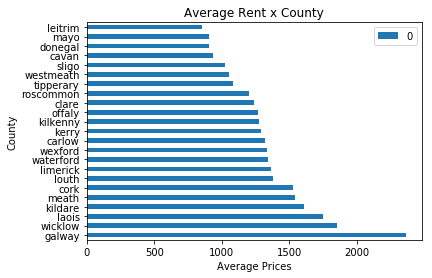

In [408]:
#plt.bar(range(len(data)), sorted(data), color='red', alpha=0.5)
#plt.barh(listOfCounties, listOfAverages)
dfAvgs.plot(kind='barh')
plt.ylabel('County')
plt.title('Average Rent x County')
plt.xlabel('Average Prices')
plt.legend()
plt.show()

## 3 Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [398]:
dfhouse=df.query('house_type == "House" and beds=="3 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

,beds,county,house_address,house_type,price
14,3 Bed,cavan,"Ballinagh1, Ballinagh, Co. Cavan",House,1200.0
18,3 Bed,cavan,"Amberwood, Ballyconnell, Co. Cavan",House,900.0
59,3 Bed,donegal,"21 Foxhills, Letterkenny, Co. Donegal",House,950.0
63,3 Bed,donegal,"Drumnaskea, Letterkenny, Co. Donegal",House,850.0
64,3 Bed,donegal,"West port, Ballyshannon, Co. Donegal",House,850.0
65,3 Bed,donegal,"Birchill Upper, Creeslough, Co. Donegal",House,800.0
136,3 Bed,leitrim,"main street, Keshcarrigan, Co. Leitrim",House,950.0
138,3 Bed,leitrim,"12 Castle Street, Manorhamilton, Co. Leitrim",House,770.0
141,3 Bed,leitrim,"4, River Meadow, Dromod, Co. Leitrim",House,1000.0
146,3 Bed,leitrim,"Cully Cottage\nCully,\nGaradice\nCo Leitrim, B...",House,1200.0


Count
23
Average
960.8695652173913
Median
950.0


## 4 Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [399]:
dfhouse=df.query('house_type == "House" and beds=="4 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

,beds,county,house_address,house_type,price
13,4 Bed,cavan,"24 Percy French Place, Ballyjamesduff, Co. Cavan",House,1100.0
53,4 Bed,donegal,"Mountain Top area\nLetterkenny, Letterkenny, C...",House,1250.0
55,4 Bed,donegal,"20 White Maple Avenue, Bundoran, Co. Donegal",House,1200.0
58,4 Bed,donegal,"57 Thornberry, Letterkenny, Co. Donegal",House,1100.0
189,4 Bed,mayo,"Sarsfield Crescent, Charlestown, Co. Mayo",House,1200.0
198,4 Bed,mayo,"12A Cuan Oisri, Belmullet, Co. Mayo",House,1000.0
228,4 Bed,roscommon,"Cloonycolgan, Roscommon F42 RH99, Roscommon To...",House,1100.0
232,4 Bed,roscommon,"Shannon Valley, Tarmonbarry, Co. Roscommon",House,1200.0
236,4 Bed,sligo,"10 beechwood court, oldbundoran Road, Sligo, C...",House,1400.0
241,4 Bed,sligo,"63. The Fairways, Tubbercurry, Co. Sligo",House,1200.0


Count
11
Average
1150.0
Median
1200.0


## All Rentals in all Counties (excluding Dublin)

In [400]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                       ):
    display(df)


,beds,county,house_address,house_type,price
0,3 Bed,carlow,"Saint Killian's Crescent, Staplestown Road, Ca...",House,989.0
1,4 Bed,carlow,"Millbrook, Mill Lane, Carlow Town, Co. Carlow",Apartment,1670.0
2,4 Bed,carlow,"Apartment 6, Castle St, Carlow Town, Co. Carlow",Apartment,1300.0
3,4 Bed,carlow,"Wolseley park, Tullow, Co. Carlow",House,2000.0
4,1 Bed,carlow,"Hanover, Carlow Town, Co. Carlow",Apartment,800.0
5,5 Bed,carlow,"58 Dublin Street, Carlow Town, Co. Carlow",Studio,1000.0
6,5 Bed,carlow,"Court View, Old Dublin Road, Carlow Town, Co. ...",House,2235.0
7,1 Bed,carlow,"Crosbie Place, Barrack Street, Carlow Town, Co...",Apartment,1753.0
8,6 Bed,carlow,"The Glen Mortarstown Carlow, Carlow Town, Co. ...",House,1000.0
9,6 Bed,carlow,"Green Road, Carlow Town, Co. Carlow",House,1000.0


In [401]:
print("Count")
print(df['price'].count())
print("Average")
print(df['price'].mean())
print("Median")
print(df['price'].median())

Count
316
Average
1366.132911392405
Median
1200.0


### Export to CSV File

In [397]:
dfhouse=df.query('house_type == "House" and (beds=="3 Bed" or beds=="4 Bed")and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
dfhouse.to_csv('3and4Bedcounty_pricesPerMonth16Jun2022.csv', index=True, encoding='utf-8')

In [402]:
def getAverage(listOfPrices):
	averagePrice = sum(listOfPrices) / float(len(listOfPrices))
	averagePrice = round(averagePrice)
	return averagePrice

